# 🔬 Beijing Air Quality
## 📘 Notebook 03 – Initial EDA

| Field         | Description                                        |
|:--------------|:---------------------------------------------------|
| Author:       |	Robert Steven Elliott                            |
| Course:       |	Code Institute – Data Analytics with AI Bootcamp |
| Project Type: |	Capstone                                         |
| Date:         |	December 2025                                    |

This project complies with the CC BY 4.0 licence by including proper attribution.

## Notebook Overview

This notebook performs the Initial Exploratory Data Analysis (EDA) for the cleaned Beijing air-quality dataset. Its purpose is to establish a foundational understanding of PM2.5 behaviour across:

- pollutant distributions
- meteorological conditions
- temporal patterns (hourly, daily, seasonal, yearly)
- spatial variation between stations
- linear and non-linear relationships

The insights gained here directly support Feature Engineering (Notebook 04) and formal validation of Hypotheses H1–H4.

The engineered dataset created later will support H5 (lag-feature modelling).


## Objectives
This notebook performs the Initial Exploratory Data Analysis (EDA):
- Data Overview Analysis
- Pollutant Distribution Analysis
- Temporal Trend Analysis
- Station Level Analysis
- Correlation and Relationship Analysis
- EDA Summary Documentation


## Inputs
- `data/cleaned/beijing_cleaned.csv`
- Key columns include:
    - datetime
    - pm25
    - temperature
    - dew_point 
    - pressure
    - rain
    - season (generated during cleaning)
    - station


## Outputs
- Summary statistics
- Distribution plots
- Temporal trend charts
- Station-level comparisons
- Correlation matrix and pairplots
- Initial insights to inform Feature Engineering & Hypothesis Testing
- Figures saved to figures/eda/

## Additional Comments

- This notebook focuses solely on exploration, not modelling.
- Seasonal labels (season) were created during the cleaning stage and are available for use in this EDA.
- Removed pollutants (PM10, SO₂, NO₂, CO, O₃) do not appear because they were dropped during data cleaning.
- Observed patterns should be carried forward to Hypothesis Testing and Feature Engineering.


## Citation  
This project uses data from:

**Chen, Song (2017). _Beijing Multi-Site Air Quality_. UCI Machine Learning Repository.**  
Chen, Song (2017). *Beijing Multi-Site Air Quality.*  
UCI Machine Learning Repository — Licensed under **CC BY 4.0**.  
DOI: https://doi.org/10.24432/C5RK5G  
Kaggle mirror by Manu Siddhartha.

---

## Notebook Setup

### Import Required Libraries

(The following libraries support analysis, plotting, and data manipulation.)

In [1]:
from pathlib import Path # for handling file paths
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for enhanced data visualization
import plotly.express as px # for interactive plots
from scipy.stats import ttest_ind, f_oneway # for statistical tests

### Configure Visual Settings

In [2]:
plt.style.use("seaborn-v0_8") # Set matplotlib style
sns.set_theme() # Set seaborn theme

### Set Up Project Paths

In [3]:
PROJECT_ROOT = Path.cwd().parent # Assuming this script is in a subdirectory of the project root
DATA_PATH = PROJECT_ROOT / "data" # Path to the data directory
INPUT_PATH = DATA_PATH / "cleaned" / "beijing_cleaned.csv" # Input file path

FIGURES_PATH = PROJECT_ROOT / "figures" / "eda" # Path to save figures
FIGURES_PATH.mkdir(parents=True, exist_ok=True) # Create directory if it doesn't exist

print("Input path :", INPUT_PATH) # Print input path

Input path : /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


### Load Dataset

In [4]:
df = pd.read_csv(INPUT_PATH) # Load the combined data
df.head() # Display the first few rows of the dataframe

,datetime,year,month,day,hour,pm25,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,latitude,longitude,area_type,season,day_of_week
0,2013-03-01 00:00:00,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan,39.941746,116.361478,urban,spring,4
1,2013-03-01 00:00:00,2013,3,1,0,3.0,-2.3,1020.8,-19.7,0.0,E,0.5,changping,40.220772,116.231204,suburban,spring,4
2,2013-03-01 00:00:00,2013,3,1,0,6.0,0.1,1021.1,-18.6,0.0,NW,4.4,gucheng,39.908156,116.239596,residential,spring,4
3,2013-03-01 00:00:00,2013,3,1,0,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,wanliu,39.990376,116.287252,residential,spring,4
4,2013-03-01 00:00:00,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,aotizhongxin,40.003388,116.407613,urban,spring,4


## Core Statistics & Probability Concepts

This project applies several foundational concepts from statistics and probability, which underpin modern data analytics. Key principles include:

### Measures of Central Tendency

- Mean — the arithmetic average; useful for comparing overall pollution levels across time.
- Median — the middle value; robust against extreme spikes during pollution episodes.
- Mode — the most common value; less relevant for continuous air-quality data but included for completeness.

### Measures of Variability

- Variance and Standard Deviation — quantify how spread out pollution levels are. Higher variance often indicates unstable meteorological conditions or emission events.
- Interquartile Range (IQR) — used in boxplots to assess seasonal or station-level pollutant variability.

### Probability Distributions

Environmental variables often approximate well-known distributions:

- Temperature and pressure approach a normal distribution.
- PM2.5 levels tend to follow a right-skewed distribution, influenced by episodic pollution events.

Understanding these distributions informs decisions about which statistical tests are appropriate.

### Hypothesis Testing

This project uses:

- t-tests (e.g., comparing weekday vs weekend pollution)
- One-way ANOVA (e.g., comparing seasonal differences in PM2.5)
- Correlation analysis (Pearson & Spearman)

A statistical hypothesis test evaluates whether observed differences are likely due to random variation or represent a meaningful effect in the population.

### Significance & p-values

A **p-value** expresses the probability of observing the given result if the null hypothesis were true.
In this project, a threshold of α = 0.05 is used.

These statistical frameworks guide the interpretation of seasonal trends, meteorological influences, and temporal dynamics in Beijing’s air quality.

## Data Overview Analysis

(Understanding structure, completeness, and variable types.)

### Structure + Missing Values

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"]) # Convert 'datetime' column to datetime
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category") # Convert 'object' column to category dtype

In [6]:
print("Dataframe Info:") # Display dataframe info
display(df.info()) # Display dataframe info
print("\nDataframe Shape:") # Display dataframe shape
display(df.shape) # Display dataframe shape
print("\nMissing Values:") # Check for missing values
display(df.isna().sum()) # Check for missing values

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime        403776 non-null  datetime64[ns]
 1   year            403776 non-null  int64         
 2   month           403776 non-null  int64         
 3   day             403776 non-null  int64         
 4   hour            403776 non-null  int64         
 5   pm25            403776 non-null  float64       
 6   temperature     403776 non-null  float64       
 7   pressure        403776 non-null  float64       
 8   dew_point       403776 non-null  float64       
 9   rain            403776 non-null  float64       
 10  wind_direction  403776 non-null  category      
 11  wind_speed      403776 non-null  float64       
 12  station         403776 non-null  category      
 13  latitude        403776 non-null  float64       
 14  longitude       4037

None


Dataframe Shape:


(403776, 18)


Missing Values:


datetime          0
year              0
month             0
day               0
hour              0
pm25              0
temperature       0
pressure          0
dew_point         0
rain              0
wind_direction    0
wind_speed        0
station           0
latitude          0
longitude         0
area_type         0
season            0
day_of_week       0
dtype: int64

### Convert dtypes

In [7]:
datetime_cols = ['datetime'] # List of datetime columns
object_cols = df.select_dtypes(include=['object']).columns.difference(datetime_cols) # Identify object type columns

df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime) # Convert datetime columns to datetime type
df[object_cols] = df[object_cols].astype('category') # Convert object columns to category type
df.info() # Display updated dataframe info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime        403776 non-null  datetime64[ns]
 1   year            403776 non-null  int64         
 2   month           403776 non-null  int64         
 3   day             403776 non-null  int64         
 4   hour            403776 non-null  int64         
 5   pm25            403776 non-null  float64       
 6   temperature     403776 non-null  float64       
 7   pressure        403776 non-null  float64       
 8   dew_point       403776 non-null  float64       
 9   rain            403776 non-null  float64       
 10  wind_direction  403776 non-null  category      
 11  wind_speed      403776 non-null  float64       
 12  station         403776 non-null  category      
 13  latitude        403776 non-null  float64       
 14  longitude       403776 non-null  flo

### Summary Statistics

In [8]:
overview_stats = df.describe().T # Get basic statistical overview
overview_stats["skew"] = df.skew(numeric_only=True) # Calculate skewness
overview_stats["kurtosis"] = df.kurtosis(numeric_only=True) # Calculate kurtosis
overview_stats # Display the overview statistics

,count,mean,min,25%,50%,75%,max,std,skew,kurtosis
datetime,403776,2015-01-30 23:29:59.999999232,2013-03-01 00:00:00,2014-02-14 11:45:00,2015-01-30 23:30:00,2016-01-16 11:15:00,2016-12-31 23:00:00,NaN,NaN,NaN
year,403776.0,2014.564194,2013.0,2014.0,2015.0,2016.0,2016.0,1.097503,-0.066413,-1.310073
month,403776.0,6.735378,1.0,4.0,7.0,10.0,12.0,3.356479,-0.053269,-1.157296
day,403776.0,15.748217,1.0,8.0,16.0,23.0,31.0,8.808891,0.005683,-1.195325
hour,403776.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922195,0.000000,-1.204174
pm25,403776.0,79.299639,2.0,21.0,55.0,110.0,999.0,79.359232,1.983801,5.758345
temperature,403776.0,14.085892,-19.9,4.0,15.4,23.5,41.6,11.304342,-0.168347,-1.088047
pressure,403776.0,1010.286926,982.4,1002.0,1009.8,1018.3,1042.8,10.357051,0.151690,-0.782775
dew_point,403776.0,3.153453,-43.4,-8.0,4.2,15.5,29.1,13.620642,-0.249785,-1.078917
rain,403776.0,0.067008,0.0,0.0,0.0,0.0,72.5,0.837576,29.449736,1292.741229


#### Section Summary — Data Overview

- PM2.5 and rain exhibit extreme skew and kurtosis, confirming heavy-tailed behaviour.
- Pressure behaves near-normally; temperature and dew point display seasonal variation.
- Dataset is structurally sound and ready for deeper analysis.

---

Having confirmed that the dataset is structurally sound, the next step is to examine the distribution of PM2.5 and related weather variables.

## Pollutant Distribution Analysis

(Exploring PM2.5 distribution and extreme events.)

### PM2.5 histogram + KDE

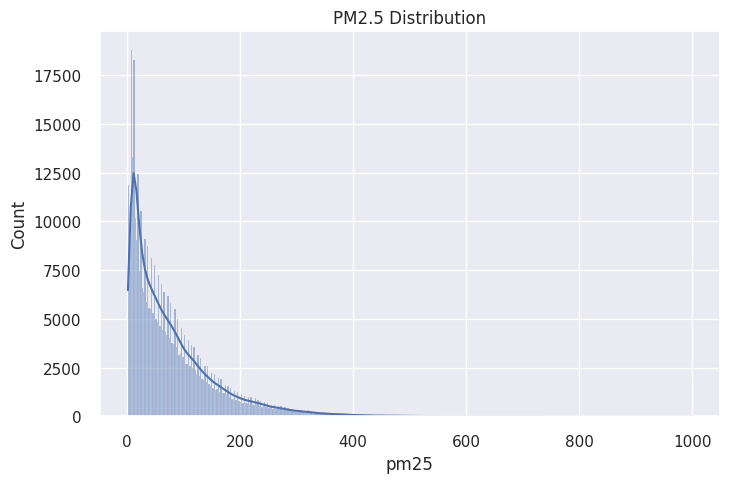

In [9]:
plt.figure(figsize=(8,5)) # Set figure size
sns.histplot(df["pm25"], kde=True) # Histogram for PM2.5 with KDE
plt.title("PM2.5 Distribution") # set title 
plt.savefig(FIGURES_PATH / "pm25_distribution.png") # Save figure
plt.show() # Show plot

#### Observations

- The PM2.5 histogram shows a strong right-skewed distribution, with most observations concentrated at lower values and a long tail extending toward very high concentrations.
- The KDE curve reinforces this pattern, revealing a pronounced peak at lower PM2.5 levels and a gradual tapering as values increase.
- The long right tail reflects frequent high-pollution events, characteristic of severe haze episodes in Beijing.
- The density of low-to-moderate values suggests that typical daily conditions are relatively clean, but rare extreme peaks significantly elevate the overall mean.
- The distribution is far from normal, with asymmetry and heavy tails that highlight substantial variability across the dataset.

#### Justification

Understanding the distribution of PM2.5 is essential for interpreting subsequent statistical tests and planning modelling strategies:

- The clear right skew confirms that PM2.5 does not meet normality assumptions, meaning that parametric tests must be applied cautiously or supported by non-parametric alternatives.
- The heavy-tailed structure suggests that modelling may benefit from:
    - log transformations,
    - robust regression techniques,
    - or models designed to handle extreme values (e.g., tree-based methods).
- The contrast between common low values and extreme high spikes reinforces the episodic nature of pollution events, which aligns with patterns seen in temporal plots (daily, monthly, seasonal).
- The KDE curve helps visualise the underlying probability distribution, supporting decisions around binning, anomaly detection, and segmentation of pollution regimes.
- This distributional insight informs hypothesis testing by clarifying that differences between groups (e.g., seasons, stations) may be influenced by the presence of severe pollution episodes.

Overall, the histogram provides a foundational understanding of PM2.5 behaviour, illustrating its skewed, heavy-tailed distribution and strengthening the rationale for using robust statistical techniques and non-linear models throughout the project.

### PM2.5 boxplot

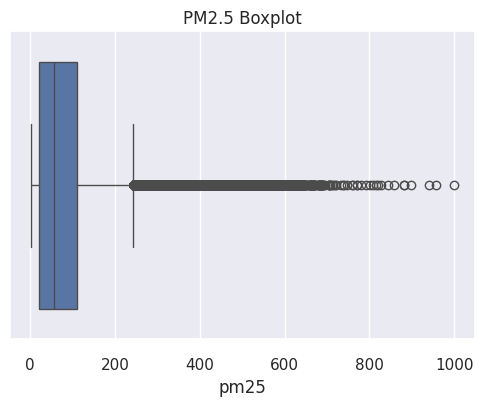

In [10]:
plt.figure(figsize=(6,4)) # Set figure size 
sns.boxplot(x=df["pm25"]) # Boxplot for PM2.5
plt.title("PM2.5 Boxplot") # set title 
plt.savefig(FIGURES_PATH / "pm25_boxplot.png") # Save figure
plt.show() # Show plot

#### Observations

- The PM2.5 boxplot shows a heavily right-skewed distribution, with the median positioned well below the upper range of values.
- A large number of high-value outliers appear on the right side of the plot, indicating frequent extreme pollution episodes.
- The interquartile range (IQR) is relatively narrow compared to the overall spread, meaning that typical daily conditions are much cleaner than the worst pollution events.
- The lower whisker and lower quartile are compressed, reflecting that a substantial proportion of observations are clustered at low-to-moderate PM2.5 levels.
- The extreme upper outliers are characteristic of Beijing’s severe haze events, which can produce very high concentrations over short periods.

#### Justification

- This boxplot provides an essential summary of PM2.5 variability and helps guide cleaning, statistical testing, and modelling decisions:
- The strong right skew and numerous outliers confirm that PM2.5 does not follow a normal distribution, justifying the need for non-parametric tests or data transformations where appropriate.
- The presence of many extreme values informs modelling decisions—models may require:
    - robust estimators,
    - log transformations,
    - or specialised handling of high pollution spikes.
- The compressed lower range and wide spread emphasise the episodic nature of pollution events, reinforcing the need for:
    - temporal features (hour, day, season),
    - and meteorological predictors that explain dispersion or stagnation.
- For hypothesis testing, this plot highlights why comparing group means (e.g., seasons or stations) must be supported with variance-aware tests and visual inspection.
- The boxplot also acts as a diagnostic tool, confirming that these extreme values represent true atmospheric events, not data entry errors.

Overall, the PM2.5 boxplot demonstrates the pollutant’s highly skewed and episodic behaviour, providing crucial context for both hypothesis validation and modelling strategy.

### Weather distributions

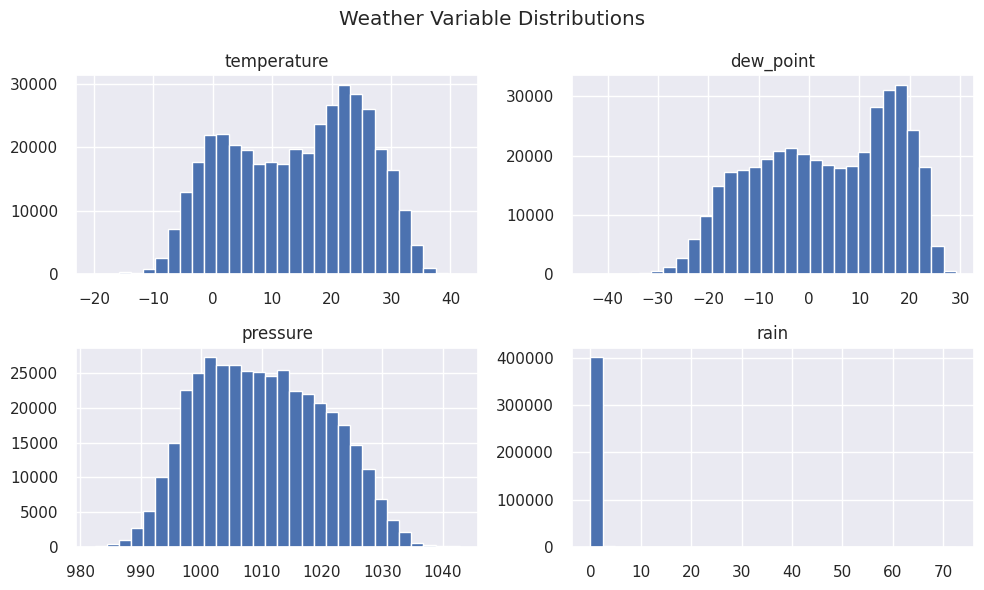

In [11]:
weather_cols = ["temperature", "dew_point", "pressure", "rain"] # Weather-related columns
df[weather_cols].hist(figsize=(10,6), bins=30) # Histograms for weather variables
plt.suptitle("Weather Variable Distributions") # set title
plt.tight_layout() # Adjust layout
plt.savefig(FIGURES_PATH / "weather_variable_distributions.png") # Save figure
plt.show() # Show plot

#### Observations

- The histograms reveal distinct distribution shapes for each weather variable.
- Temperature displays a roughly bimodal pattern, reflecting Beijing’s strong seasonal contrast between hot summers and cold winters.
- Dew_point shows a similar seasonal structure, with broader spread in warm months and lower values concentrated in winter.
- Pressure appears approximately normally distributed, centred around typical mid-latitude atmospheric pressures, with limited skew.
- Rain shows a highly zero-inflated distribution, with most observations at zero and a long tail of occasional rainfall events.
- The histograms confirm that weather variables vary across wide ranges, which is expected for a dataset spanning multiple years and full seasonal cycles.

#### Justification

These distribution plots help characterise the underlying behaviour of meteorological variables and inform both hypothesis testing and feature engineering:

- Non-normal distributions and seasonal patterns indicate that weather effects on PM2.5 are unlikely to be purely linear, reinforcing the need for flexible modelling approaches.
- The similarity between temperature and dew point distributions highlights their strong relationship, supporting careful management of collinearity in modelling.
- The normal-like distribution of pressure suggests it may behave more predictably and could complement other variables in modelling seasonal or daily PM2.5 variation.
- The skewed, zero-heavy rainfall distribution suggests rainfall acts as an intermittent driver, motivating the creation of engineered features such as:
    - rain/no-rain indicators
    - cumulative or lagged rainfall
    - event-based weather flags
- Understanding the variability and distribution shapes improves the interpretation of correlations, pairplots, and statistical tests performed later.

Overall, these histograms provide a foundational understanding of weather behaviour in the dataset, guiding assumptions for subsequent hypothesis validation and informing decisions about feature transformations and model design.

### Section Summary — Pollutant & Weather Distributions

- PM2.5 is highly skewed with many outliers → episodic severe pollution events.
- Weather variables show strong seasonality and non-normality.
- These patterns justify transformations, robust models, and engineered features.

---

## Temporal Trend Analysis

(Understanding pollution patterns across multiple time scales.)

### Daily trend

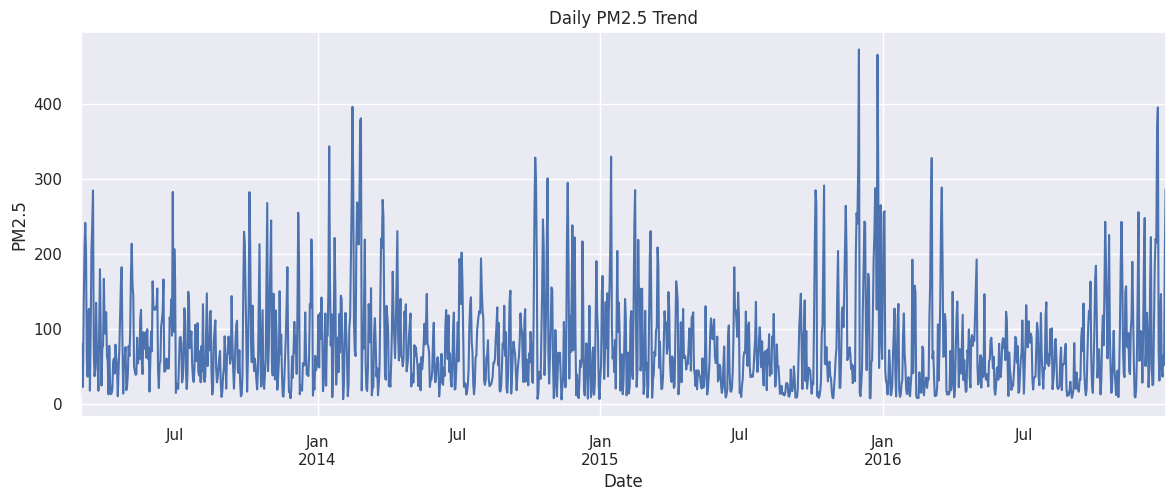

In [12]:
daily = df.resample("D", on="datetime")["pm25"].mean() # Daily average PM2.5

plt.figure(figsize=(14,5)) # Plot daily PM2.5 trend
daily.plot() # Line plot for daily averages
plt.title("Daily PM2.5 Trend") # set title
plt.xlabel("Date") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.savefig(FIGURES_PATH / "daily_pm25_trend.png") # Save figure
plt.show() # Show plot

#### Observations

- The plot shows a day-by-day trend of PM2.5 levels across the full time period, revealing substantial short-term variability that is not visible in monthly or seasonal summaries.
- Distinct pollution spikes appear, representing severe haze events where PM2.5 levels rise sharply over consecutive days.
- Periods of relatively low values reflect clean-air episodes, often tied to favourable meteorological conditions such as strong winds or rainfall.
- A broader pattern emerges where winter periods generally show higher daily averages, while summer periods trend lower, mirroring the seasonal cycle already observed.
- The line appears “noisy,” which is expected for daily data, but clear clusters of high or low periods are visible, indicating persistent multi-day pollution episodes.

#### Justification

The daily time-series view provides an important intermediary level of temporal resolution, connecting the broader seasonal patterns to the finer hourly behaviour:

- Resampling to daily means smooths out hourly fluctuations while still preserving short-term dynamics, making it easier to identify sustained pollution events.
- This plot highlights that PM2.5 levels exhibit temporal autocorrelation—polluted days tend to cluster rather than appear randomly—supporting the need for lag features in modelling.
- The clear seasonal oscillation within the daily trend reinforces the relevance of season, month, and temperature-related drivers explored in Hypothesis 1.
- The presence of multi-day spikes suggests that meteorology and emissions interact to produce episodic pollution events, which may require targeted investigation or specialised modelling approaches.
- Daily aggregation also helps identify irregularities or anomalies that may need attention before building forecasting models.

Overall, the daily PM2.5 trend illustrates both short-term fluctuations and seasonal structure, bridging the gap between fine-grained hourly analysis and broader temporal summaries. It supports the need for time-aware modelling techniques and justifies the engineered temporal features used later in the project.

### Seasonal Averages

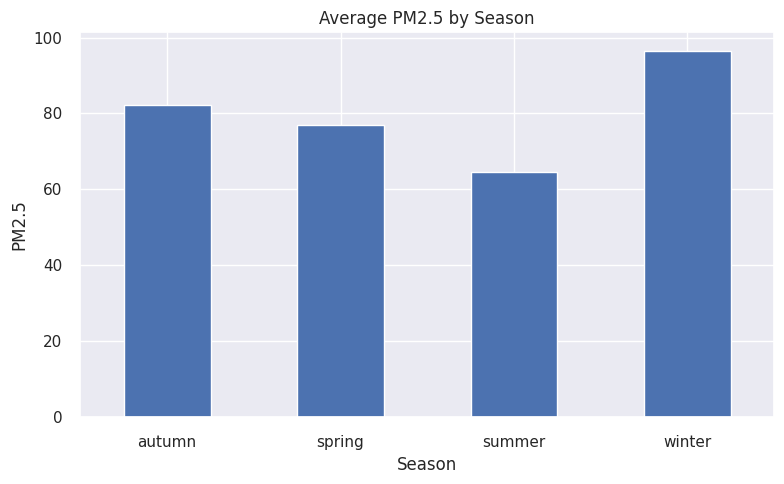

In [13]:
seasonal = df.groupby("season", observed=False)["pm25"].mean() # Average PM2.5 by season
 
plt.figure(figsize=(8,5)) # Plot average PM2.5 by season
seasonal.plot(kind="bar") # Bar plot for seasonal averages
plt.title("Average PM2.5 by Season") # set title
plt.xlabel("Season") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.xticks(rotation=0) # Rotate x-ticks for better readability
plt.tight_layout() # Adjust layout
plt.savefig(FIGURES_PATH / "average_pm25_by_season.png") # Save figure
plt.show() # Show plot

### Seasonal PM2.5 T-Test

In [14]:
winter = df[df['season'] == 'winter']['pm25'].dropna()
spring = df[df['season'] == 'spring']['pm25'].dropna()
summer = df[df['season'] == 'summer']['pm25'].dropna()
autumn = df[df['season'] == 'autumn']['pm25'].dropna()

F_stat, p_value = f_oneway(winter, spring, summer, autumn)
F_stat, p_value

(np.float64(2696.1774773651814), np.float64(0.0))

#### Interpretation:

- p < 0.05 indicates that PM2.5 levels differ significantly across seasons.
- This supports Hypothesis H1 and confirms that seasonal effects are not random.
- Because PM2.5 is skewed, we rely on visual confirmation + statistical evidence, aligning with good analytical practice.

#### Observations

- The seasonal bar chart shows a clear and pronounced seasonal cycle in PM2.5 levels across Beijing.
- Winter has the highest average PM2.5 concentrations, reflecting frequent stagnant meteorological conditions, temperature inversions, and increased heating-related emissions.
- Summer exhibits the lowest seasonal averages, consistent with stronger atmospheric mixing, higher wind speeds, and more effective dispersion of pollutants.
- Spring and autumn show intermediate levels, acting as transitional seasons with moderate pollution compared to the winter peak and summer trough.
- The contrast between winter and summer is especially large, indicating that seasonal effects are a dominant driver of PM2.5 variation.
- This is corroborated by the `p_value` of `0`, showing that winter is significantly different than summer

#### Justification

This seasonal summary provides the essential high-level view needed to validate Hypothesis 1 and motivates deeper statistical analysis:

- The strong seasonal differences suggest that PM2.5 levels are systematically influenced by season-specific meteorological and emission patterns rather than random fluctuations.
- The pronounced winter peak and summer minimum support using season as a categorical variable in hypothesis testing (ANOVA) and in later modelling stages.
- Aggregating data into broad seasonal groups reduces month-to-month noise and highlights robust, recurring temporal structure, making it ideal for initial hypothesis validation.
- These findings justify further analysis using:
    - seasonal distribution plots
    - statistical comparison tests (ANOVA + Tukey)
    - engineered temporal features (season, month, cyclical encodings)
- The results also reinforce that forecasting models must incorporate seasonal effects because PM2.5 behaviour changes substantially across the year.

Overall, the seasonal plot provides strong preliminary evidence that PM2.5 displays a consistent and meaningful seasonal pattern, forming the basis for your formal validation of Hypothesis 1.

### Monthly averages

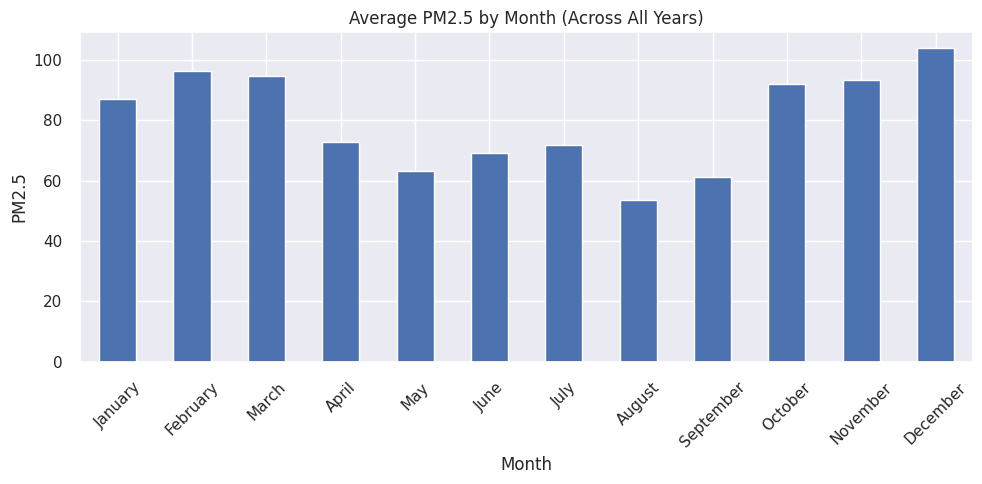

In [15]:
monthly = df.groupby("month")["pm25"].mean() # Average PM2.5 by month across all years

monthly.index = monthly.index.map(lambda x: pd.to_datetime(str(x), format="%m").strftime("%B")) # Map month numbers to month names

plt.figure(figsize=(10,5)) # Plot average PM2.5 by month
monthly.plot(kind="bar") # Bar plot for monthly averages
plt.title("Average PM2.5 by Month (Across All Years)") # set title
plt.xlabel("Month") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.savefig(FIGURES_PATH / "average_pm25_by_month.png") # Save figure
plt.show() # Show plot

#### Observations

- The monthly bar chart reveals a clear seasonal cycle in PM2.5 levels when averaged across all years.
- December, January, and February show the highest PM2.5 concentrations, confirming winter as the most polluted season.
- June, July, and August display the lowest monthly averages, corresponding to summer’s improved atmospheric ventilation and stronger mixing.
- Spring (March–May) and autumn (September–November) fall between the extremes, acting as transitional periods with moderate levels.
- The strong contrast between winter peaks and summer troughs demonstrates a robust and repeating seasonal pattern, even when aggregated across multiple years.
- The smoothness of the monthly cycle indicates that these seasonal differences are consistent rather than driven by anomalies.

#### Justification

This monthly view strengthens the evidence for seasonal patterns in PM2.5 and directly supports further hypothesis testing:

- The clear winter–summer contrast provides strong preliminary support for Hypothesis 1, motivating the use of ANOVA or other statistical tests to quantify seasonal differences.
- Aggregating across all years filters out interannual noise, highlighting true underlying seasonal structure that influences pollution dynamics.
- These trends justify including month and season as engineered temporal features, especially with cyclical encoding to capture their repeating nature.
- The pronounced winter peaks reflect the influence of:
    - heating emissions
    - reduced atmospheric mixing
    - temperature inversions
    - meteorological stagnation
- Summer troughs support existing literature showing the role of stronger planetary boundary layers and enhanced pollutant dispersion.
- This baseline monthly analysis supports the design of temporal models under Hypothesis 4, ensuring that PM2.5’s seasonal cycle is represented appropriately.

Overall, the Monthly PM2.5 plot provides a strong, aggregated view of seasonal behaviour that validates further hypothesis testing and informs feature engineering for forecasting models.

### Month–Year Trend (Combined)

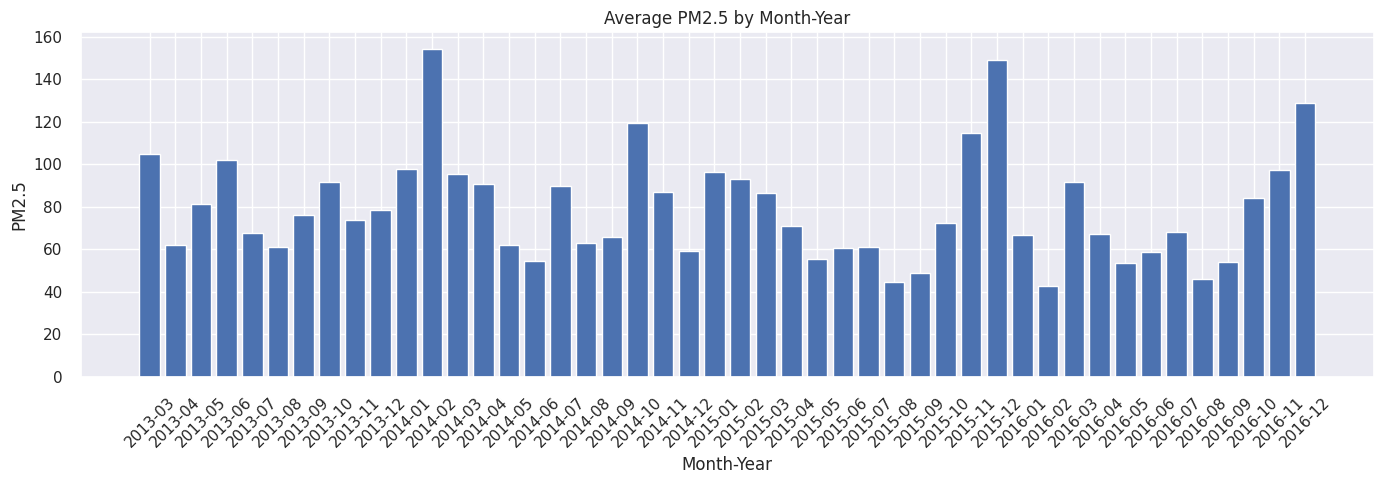

In [16]:
monthly_year = df.groupby(["year", "month"])["pm25"].mean().reset_index() # Average PM2.5 by month-year
monthly_year["year_month"] = monthly_year["year"].astype(str) + "-" + monthly_year["month"].astype(str).str.zfill(2) # Create year-month string

plt.figure(figsize=(14,5)) # Plot average PM2.5 by month-year
plt.bar(monthly_year["year_month"], monthly_year["pm25"]) # Bar plot for month-year averages
plt.xticks(rotation=45) # Rotate x-axis labels
plt.title("Average PM2.5 by Month-Year") # set title
plt.xlabel("Month-Year") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.tight_layout() # Adjust layout
plt.savefig(FIGURES_PATH / "average_pm25_by_month_year.png") # Save figure
plt.show() # Show plot

#### Observations

- The Month–Year bar chart shows clear recurring peaks and troughs, revealing strong seasonal fluctuations repeated across multiple years.
- Winter months consistently exhibit the highest PM2.5 levels, with prominent spikes around December–January in each year represented.
- Summer months tend to display much lower values, forming regular troughs that align with Beijing’s cleaner, more ventilated warm-season conditions.
- Transitional months (spring and autumn) fall between the extremes, though some years show notable anomalies, such as unusually high or low months.
- The repeating seasonal pattern across multiple years confirms that these trends are not random noise but part of a stable annual cycle.
- Interannual differences are visible—some winter seasons are more polluted than others—indicating that year-specific factors also modulate PM2.5 intensity.

#### Justification

This Month–Year plot provides detailed temporal granularity that strengthens understanding of PM2.5 behaviour over both seasonal and multi-year scales:

- The repeated winter peaks provide strong evidence for Hypothesis 1 (seasonal variation in PM2.5), supporting more formal validation through group comparison tests.
- The Month–Year view shows that temporal variation is structured, cyclical, and consistent, justifying the inclusion of month, season, and year features in the engineered dataset.
- The variability between years demonstrates the importance of interannual factors, supporting subsequent analyses under Hypothesis 4 (temporal structure).
- Observing recurring seasonal cycles emphasises that forecasting models must incorporate temporal dynamics, possibly through:
    - cyclical encodings
    - lag features
    - seasonal decomposition
    - and interaction terms (e.g., month × weather)
- This plot highlights potential anomalous months that may warrant deeper inspection or filtering in downstream modelling.

Overall, the Month–Year analysis reinforces the presence of strong seasonal structure, interannual variability, and consistent temporal patterns — all central to designing robust statistical tests and predictive models.

### Hourly pattern

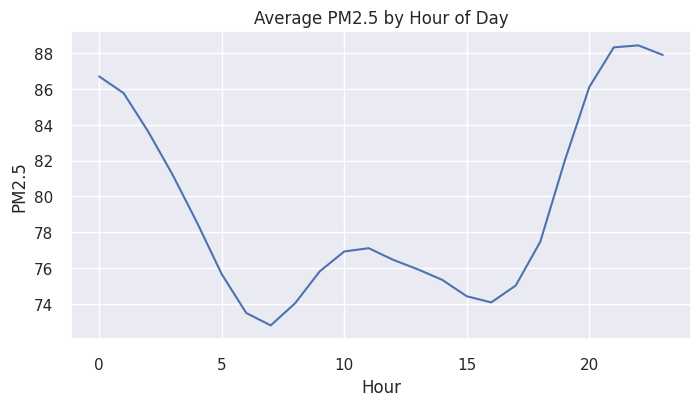

In [17]:
hourly = df.groupby("hour")["pm25"].mean() # Average PM2.5 by hour of day

plt.figure(figsize=(8,4)) # Plot average PM2.5 by hour of day
hourly.plot() # Line plot for hourly averages
plt.title("Average PM2.5 by Hour of Day") # set title
plt.xlabel("Hour") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.savefig(FIGURES_PATH / "average_pm25_by_hour.png") # Save figure
plt.show() # Show plot

#### Observations

- The line plot shows a clear diurnal pattern in PM2.5 levels, with concentrations varying systematically across the 24-hour cycle.
- PM2.5 often appears higher during early morning hours, likely linked to rush-hour traffic, boundary-layer stability, and overnight pollutant accumulation.
- Midday hours tend to show lower average PM2.5, corresponding to increased atmospheric mixing, stronger winds, and deeper boundary layers that disperse pollution.
- Evening levels may rise again slightly due to commuting emissions and the return of a shallower boundary layer.
- This pattern demonstrates that daily human activity and atmospheric physics both influence pollutant concentration throughout the day.

#### Justification

The hourly mean plot provides an important component of temporal EDA that directly informs your later hypothesis testing and modelling:

- The pronounced diurnal pattern supports the inclusion of hour-of-day as a key temporal feature in the engineered dataset, particularly via cyclical encoding.
- These results confirm that PM2.5 exhibits short-term temporal structure, reinforcing the need for Hypothesis 4 analysis and for lag-based modelling approaches in Hypothesis 5.
- The presence of morning peaks and midday troughs indicates that pollution levels cannot be treated as independent hourly observations; they depend on atmospheric mixing cycles.
- The pattern suggests that models may benefit from hourly lags, rolling windows, and potentially interaction terms between hour and weather variables.

Overall, the hourly mean analysis reveals a robust diurnal cycle that shapes PM2.5 dynamics and must be accounted for in both hypothesis validation and downstream forecasting models.

### Year-on-year trend

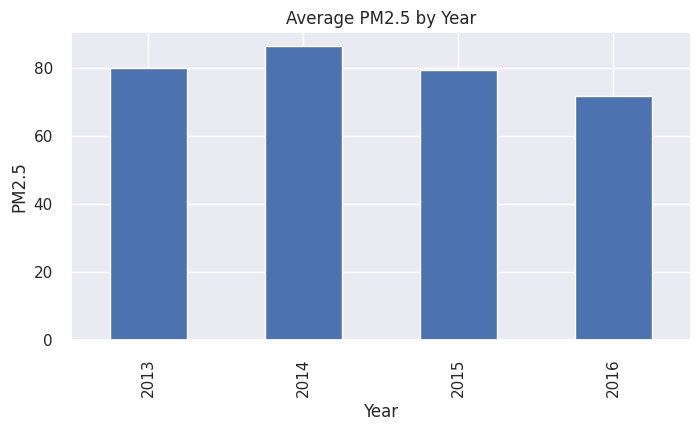

In [18]:
yearly = df.groupby("year")["pm25"].mean() # Average PM2.5 by year

plt.figure(figsize=(8,4)) # Plot average PM2.5 by year
yearly.plot(kind="bar") # Bar plot for yearly averages
plt.title("Average PM2.5 by Year") # set title
plt.xlabel("Year") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.savefig(FIGURES_PATH / "average_pm25_by_year.png") # Save figure
plt.show() # Show plot

#### Observations

- The bar chart shows that average PM2.5 levels vary noticeably from year to year, indicating year-on-year fluctuations in Beijing’s air quality.
- Some years record higher mean pollution, suggesting periods with more frequent haze events, adverse weather conditions, or increased emissions.
- Other years show lower annual averages, potentially reflecting improved pollution control measures, favourable meteorology, or broader environmental interventions.
- The general pattern suggests no simple linear trend, but rather a combination of gradual changes and annual variability.
- This variability highlights that long-term PM2.5 behaviour is influenced by both structural factors (policy, urban growth) and short-term meteorology.

#### Justification

This plot provides an initial temporal overview that helps contextualise seasonal and spatial patterns in subsequent analyses. Specifically:

- The presence of year-to-year differences supports examining temporal structure more formally (Hypothesis 4), including the role of seasonal cycles, extreme episodes, and long-term trends.
- Identifying years with higher and lower averages aids in interpreting anomalies in monthly and seasonal patterns found earlier.
- These results justify incorporating year features into the feature-engineered dataset and modelling pipeline, as long-term signals may influence predictive performance.
- The lack of a strong monotonic trend suggests that PM2.5 dynamics cannot be explained by simple yearly averages, motivating deeper exploration using time-series decomposition, lag effects, and interaction terms.

Overall, the yearly mean plot situates PM2.5 levels within a broader temporal context and validates the need to account for both seasonal and interannual variation when analysing and forecasting Beijing’s air quality.

### Section Summary — Temporal Structure

- Clear winter peaks and summer lows in PM2.5.
- Strong diurnal cycle with morning peaks and midday troughs.
- Interannual variation present but not monotonic.
- Indicates temporal autocorrelation → supports lag features and cyclical encodings.

---

## Station Level Analysis

This section compares air quality across stations to understand geographic variation within Beijing. Stations with higher baseline pollution may reveal localised environmental factors.

### Average PM2.5 by Station

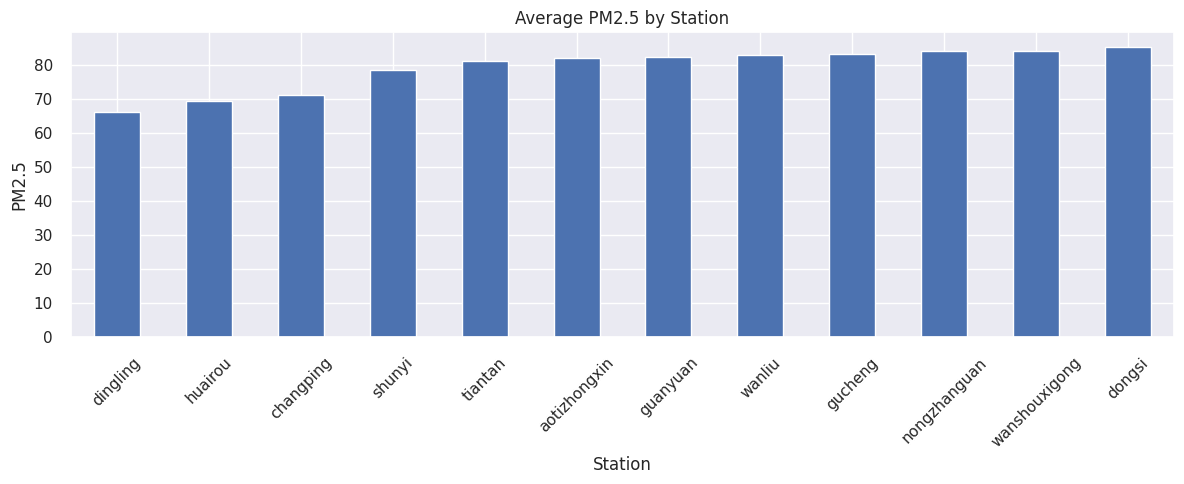

In [19]:
station_mean = df.groupby("station", observed=False)["pm25"].mean().sort_values() # Average PM2.5 by station

station_mean.plot(kind="bar", figsize=(12,5)) # Bar plot for station averages
plt.title("Average PM2.5 by Station") # set title
plt.ylabel("PM2.5") # set y-axis label
plt.xlabel("Station") # set x-axis label
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.savefig(FIGURES_PATH / "average_pm25_by_station.png") # Save figure
plt.show() # Show plot

#### Section Summary — Spatial Variation

- Significant spatial variability across stations.
- Urban/industrial stations show higher PM2.5; suburban/rural stations lower.
- Supports Hypothesis 2 and use of geographic metadata.

---

## Correlation and Relationship Analysis

### Pairwise scatterplots

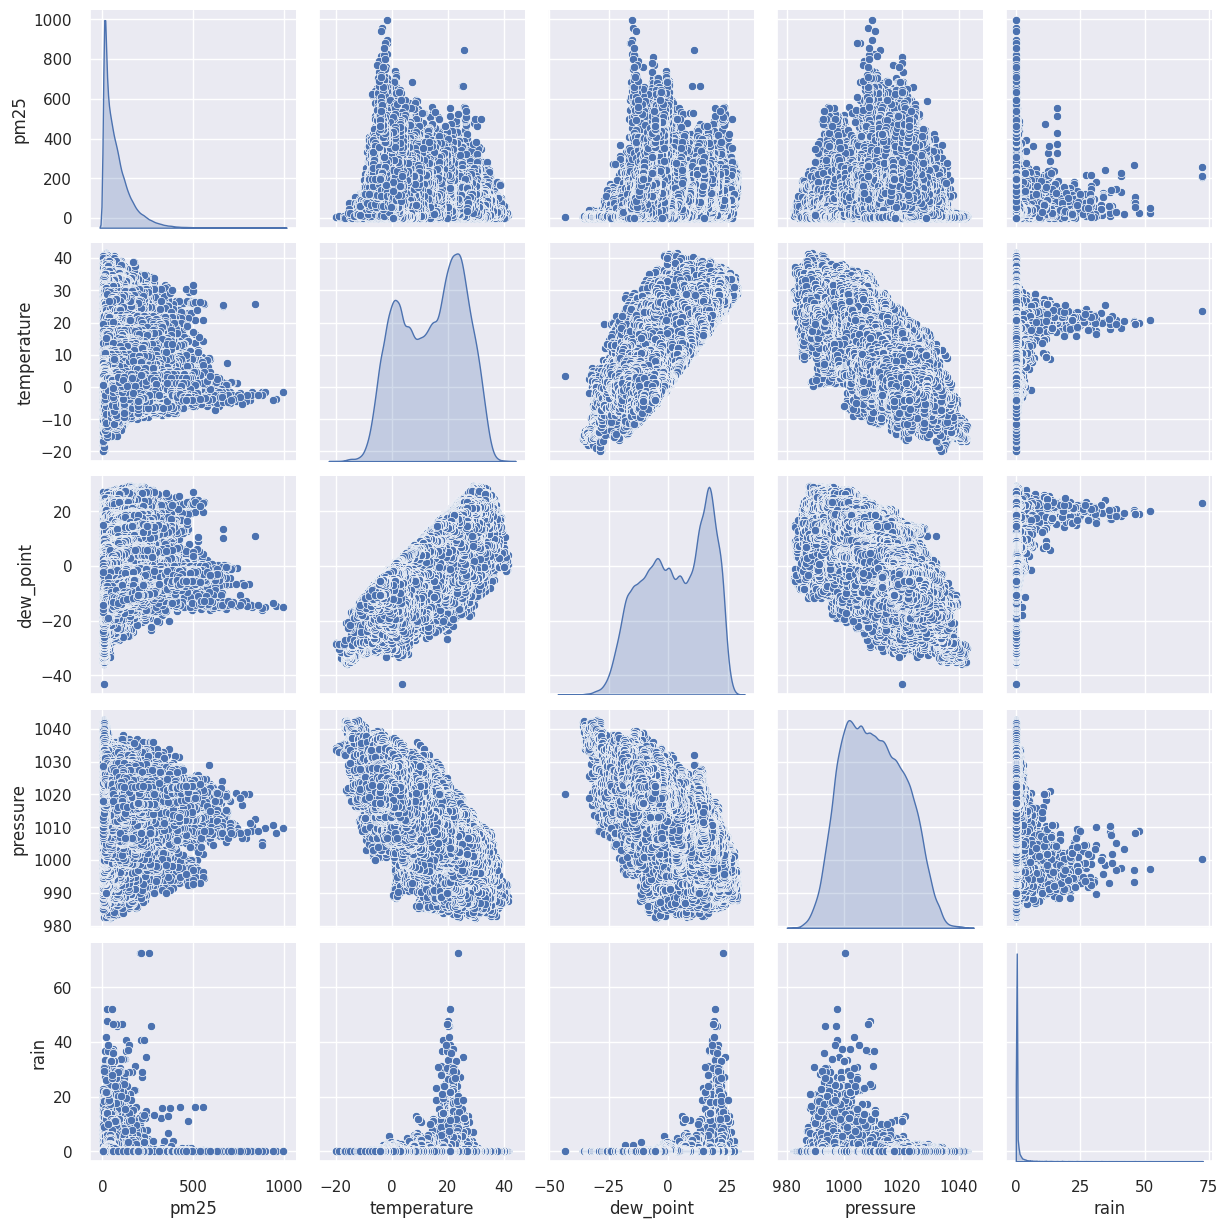

In [20]:
sns.pairplot(df[["pm25", "temperature", "dew_point", "pressure", "rain"]], diag_kind="kde") # Pairplot of selected variables
plt.savefig(FIGURES_PATH / "pairplot_pm25_weather.png") # Save figure
plt.show() # Show plot

#### Observations

- The diagonal KDE plots show that PM2.5 is right-skewed, reflecting frequent low-to-moderate pollution with occasional severe spikes.
- Rain exhibits a highly zero-inflated distribution, as expected—most hours record no rainfall.
- Temperature and dew_point display strong positive correlation, visible as a tight upward-sloping scatter pattern.
- PM2.5 shows no clear linear relationship with temperature, dew point, or pressure in the raw space—points form loose clouds rather than trends.
- A slight negative association appears between PM2.5 and rain, consistent with the washout effect during precipitation.
- Scatterplots indicate seasonal clustering, especially in temperature–pressure and temperature–dew point relationships, reflecting Beijing's strong seasonal climate structure.

#### Justification
The pairplot provides a high-level visual assessment of both univariate distributions and bivariate relationships among the meteorological variables and PM2.5. These patterns indicate that:
- Linear correlations between PM2.5 and weather variables are weak, suggesting the need for non-linear modelling approaches or feature engineering (e.g., interactions, lagged weather effects).
- The strong coupling between temperature and dew_point supports including only one or applying regularisation to avoid multicollinearity.
- Zero-inflation in the rain variable highlights that rainfall may act as an episodic driver rather than a continuous predictor.
- Right-skew in PM2.5 reinforces the need to check for outliers and consider transformations or robust statistical techniques.
- Overall, this visual diagnostic helps guide subsequent hypothesis testing and model design, clarifying which features may contribute meaningfully to PM2.5 variation.

### Correlation heatmap

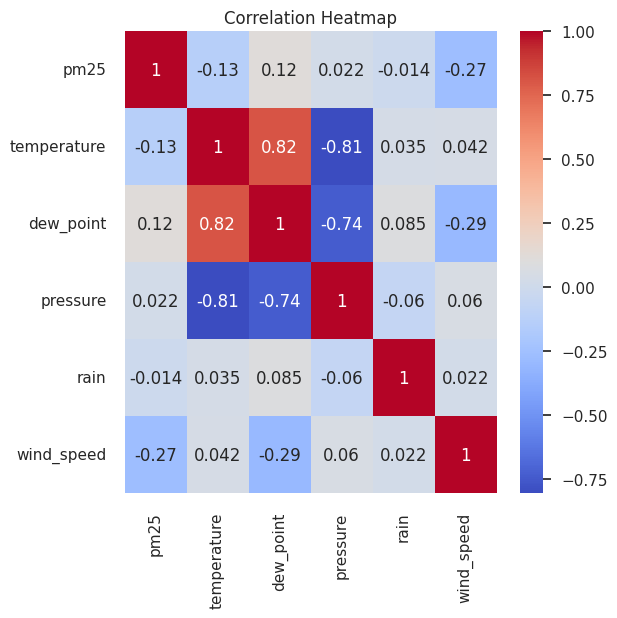

In [21]:
plt.figure(figsize=(6,6)) # Correlation heatmap
columns = ["pm25", "temperature", "dew_point", "pressure", "rain", "wind_speed", "wind_direction"] # Selected columns for correlation
sns.heatmap(df[columns].corr(numeric_only=True), annot=True, cmap="coolwarm") # Heatmap of correlations
plt.title("Correlation Heatmap") # set title
plt.savefig(FIGURES_PATH / "correlation_heatmap.png") # Save figure
plt.show() # Show plot

#### Observations

- PM2.5 shows weak correlations with most meteorological variables, confirming that no single weather factor has a dominant linear influence.
- A slight negative correlation appears between PM2.5 and rain, consistent with rainfall’s washout effect.
- Temperature and dew_point exhibit a strong positive correlation, reflecting their shared physical dependence on atmospheric moisture.
- Temperature and pressure display a moderate negative correlation, aligning with expected seasonal and synoptic weather patterns.
- Wind_speed shows a small negative correlation with PM2.5, suggesting that stronger winds offer some dispersion, but the effect is modest.
- Wind_direction shows no meaningful linear correlation with other variables due to its circular nature (0–360°), which the correlation matrix cannot fully capture.
- Overall, correlations are relatively low, reinforcing that PM2.5 variability is multifactorial and non-linear.

#### Justification

The heatmap provides a concise summary of linear relationships between PM2.5 and key meteorological variables. These results indicate that:

- Meteorological drivers of PM2.5 are not strongly linear, implying the need for non-linear models, interaction terms, or lagged features to capture more complex dynamics.
- Strong collinearity between temperature and dew_point supports careful feature selection or regularisation to avoid redundancy in modelling.
- Weak correlations with wind_speed and rain suggest that their effect on PM2.5 is likely episodic or threshold-based, not continuous, strengthening the case for additional feature engineering.
- The inability of the heatmap to represent cyclical data (wind direction) highlights the importance of circular encodings or directional clustering in later analyses.

Overall, the correlation heatmap clarifies which variables offer potential predictive value and which require more advanced treatment, contributing directly to the design of feature engineering and hypothesis testing for PM2.5 dynamics.

### Section Summary — Relationships

- Weak linear correlations → PM2.5 influenced by non-linear, multifactorial drivers.
- Strong temperature–dew point correlation → manage multicollinearity.
- Wind direction requires circular encoding.
- Motivates more complex feature engineering and non-linear models.

---

## Overall Conclusion

The Initial EDA reveals that PM2.5 behaviour is driven by a combination of extreme-value properties, strong seasonal cycles, diurnal structure, multi-day pollution episodes, and spatial variability, with only modest linear influence from meteorological variables.
These insights directly inform:

- Feature Engineering (Notebook 04)
- Hypothesis Validation (Notebooks 05 - 09)
- Temporal + spatial modelling strategy

---

## Reflection on Analytical Challenges

Environmental datasets such as PM2.5 present several practical challenges that shaped the analytical decisions in this EDA. The data exhibits strong right-skew and heavy tails, meaning that extreme haze events can disproportionately influence summary statistics and model behaviour. In addition, the presence of temporal autocorrelation — where pollution levels on one day or hour are dependent on previous values — limits the applicability of traditional statistical tests and requires careful use of lagged features and rolling windows. Meteorological variables also show non-linear relationships and seasonal structure, complicating simple interpretation and motivating the use of engineered interactions and cyclical encodings. These challenges highlight the importance of combining visual diagnostics with robust statistical methods and justify the feature engineering and modelling strategies explored in later notebooks.

## How These Statistical Concepts Support the EDA

These statistical principles frame the entire EDA:

- Distribution analysis reveals skew and kurtosis → essential for selecting robust models
- Measures of spread show the extent of variability → guiding feature engineering decisions
- Probability shapes expectations for seasonal patterns, extreme events, and group comparisons
- Hypothesis tests provide a formal foundation for validating trends seen in plots
- Understanding uncertainty ensures that visual observations are supported by statistical evidence

This alignment between quantitative summary and visual exploration strengthens the reliability of insights drawn from the dataset.

---
### AI Assistance Note
Some narrative text and minor formatting or wording improvements in this notebook were supported by AI-assisted tools (ChatGPT for documentation clarity, Copilot for small routine code suggestions, and Grammarly for proofreading). All analysis, code logic, feature engineering, modelling, and interpretations were independently created by the author.
